## Introduction to visualizing data in the eeghdf files

In [1]:

# I have copied the stacklineplot from my python-edf/examples code to help with display. Maybe I will put this as a helper or put it out as a utility package to make it easier to install.

from __future__ import print_function, division, unicode_literals
%matplotlib inline
# %matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import pandas as pd
import numpy as np
import h5py
from pprint import pprint

import stacklineplot

In [2]:
# matplotlib.rcParams['figure.figsize'] = (18.0, 12.0)
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

In [3]:

hdf = h5py.File('../data/spasms.eeghdf','r')

In [4]:
pprint(list(hdf.items()))
pprint(list(hdf['patient'].attrs.items()))

[('patient', <HDF5 group "/patient" (0 members)>),
 ('record-0', <HDF5 group "/record-0" (10 members)>)]
[('patient_name', '906, Subject'),
 ('patientcode', '0bf1acf3d68c50938e6f9dd40906f3ad'),
 ('gender', 'Male'),
 ('birthdate', '1990-01-01'),
 ('patient_additional', ''),
 ('gestatational_age_at_birth_days', -1.0),
 ('born_premature', 'unknown')]


In [5]:
rec = hdf['record-0']
pprint(list(rec.items()))
pprint(list(rec.attrs.items()))
years_old = rec.attrs['patient_age_days']/365
pprint("age in years: %s" % years_old)

[('edf_annotations', <HDF5 group "/record-0/edf_annotations" (3 members)>),
 ('physical_dimensions',
  <HDF5 dataset "physical_dimensions": shape (36,), type "|O">),
 ('prefilters', <HDF5 dataset "prefilters": shape (36,), type "|O">),
 ('signal_digital_maxs',
  <HDF5 dataset "signal_digital_maxs": shape (36,), type "<i4">),
 ('signal_digital_mins',
  <HDF5 dataset "signal_digital_mins": shape (36,), type "<i4">),
 ('signal_labels', <HDF5 dataset "signal_labels": shape (36,), type "|O">),
 ('signal_physical_maxs',
  <HDF5 dataset "signal_physical_maxs": shape (36,), type "<f8">),
 ('signal_physical_mins',
  <HDF5 dataset "signal_physical_mins": shape (36,), type "<f8">),
 ('signals', <HDF5 dataset "signals": shape (36, 446000), type "<i2">),
 ('transducers', <HDF5 dataset "transducers": shape (36,), type "|O">)]
[('start_isodatetime', '1990-06-17 13:20:56'),
 ('end_isodatetime', '1990-06-17 13:58:06'),
 ('number_channels', 36),
 ('number_samples_per_channel', 446000),
 ('sample_frequen

In [6]:
signals = rec['signals']
labels = rec['signal_labels']
electrode_labels = [str(s,'ascii') for s in labels]
numbered_electrode_labels = ["%d:%s" % (ii, str(labels[ii], 'ascii')) for ii in range(len(labels))]

#### Simple visualization of EEG (electrodecrement seizure pattern)

In [7]:
# plot 10s epochs (multiples in DE)
ch0, ch1 = (0,19)
DE = 2 # how many 10s epochs to display
epoch = 53; ptepoch = 10*int(rec.attrs['sample_frequency'])
dp = int(0.5*ptepoch)
# stacklineplot.stackplot(signals[ch0:ch1,epoch*ptepoch+dp:(epoch+DE)*ptepoch+dp],seconds=DE*10.0, ylabels=electrode_labels[ch0:ch1], yscale=0.3)
print("epoch:", epoch)



epoch: 53


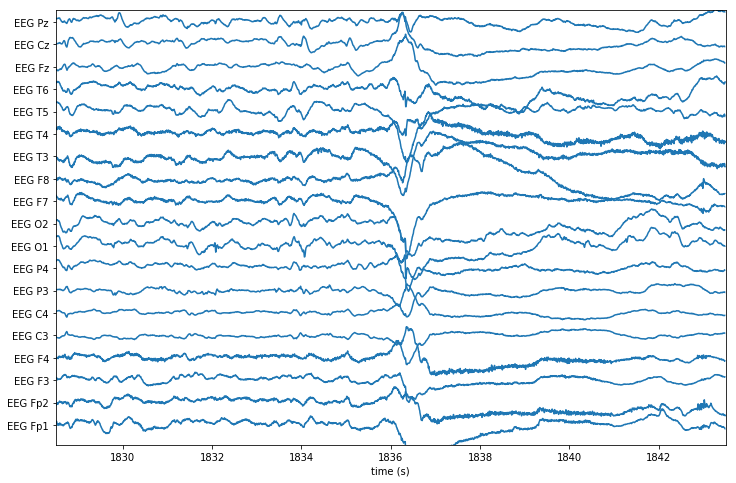

In [8]:
# search identified spasms at 1836, 1871, 1901, 1939
stacklineplot.show_epoch_centered(signals, 1836,
                        epoch_width_sec=15,
                        chstart=0, chstop=19, fs=rec.attrs['sample_frequency'],
                        ylabels=electrode_labels, yscale=3.0)



In [9]:
annot = rec['edf_annotations']
#print(list(annot.items()))
#annot['texts'][:]

In [10]:
signals.shape

(36, 446000)

In [11]:
antext = [s.decode('utf-8') for s in annot['texts'][:]]
starts100ns = [xx for xx in annot['starts_100ns'][:]]
len(starts100ns), len(antext)

(66, 66)

In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame(data=antext, columns=['text'])
df['starts100ns'] = starts100ns
df['starts_sec'] = df['starts100ns']/10**7

In [14]:
df # look at the annotations

,text,starts100ns,starts_sec
0,REC START Biocal CAL,0,0.000
1,A1+A2 OFF,11400000,1.140
2,PAT Biocal EEG,61900000,6.190
3,PAT A_DB EEG,114200000,11.420
4,IMP CHECK ON,564500000,56.450
5,IMP CHECK OFF,593500000,59.350
6,resting on right sid,731150000,73.115
7,head on right side,772180000,77.218
8,head on neckroll,809810000,80.981
9,nursnig quietly,856350000,85.635


In [15]:
df[df.text.str.contains('sz',case=False)]

,text,starts100ns,starts_sec


In [16]:
df[df.text.str.contains('seizure',case=False)] # find the seizure

,text,starts100ns,starts_sec


In [17]:
df[df.text.str.contains('spasm',case=False)] # find the seizure

,text,starts100ns,starts_sec
54,SPASM?,18367010000,1836.701
55,SPASM?,18710300000,1871.030
56,SPASM,19014460000,1901.446
57,SPASM,19388010000,1938.801


In [18]:
list(annot.items())

[('durations_char16',
  <HDF5 dataset "durations_char16": shape (66,), type "|S16">),
 ('starts_100ns', <HDF5 dataset "starts_100ns": shape (66,), type "<i8">),
 ('texts', <HDF5 dataset "texts": shape (66,), type "|O">)]